In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


## LIBRARIES:

In [ ]:
import numpy as np
import pandas as pd
import json
import re

from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('seaborn-whitegrid')

# PATHS:

In [ ]:
data_path = 'gdrive/My Drive/1A_WOC/2A_PROJECTS/2_APPAREL_RECOMMENDATION/DATA/'
data_path_2 = 'gdrive/My Drive/1A_WOC/2A_PROJECTS/2_APPAREL_RECOMMENDATION/DATA_NEW/'

# A.DATA:

In [ ]:
df1= pd.read_json(data_path + 'tops.json')

print(df1.shape)
df1.sample(5)

(183138, 19)


,sku,asin,product_type_name,formatted_price,author,color,brand,publisher,availability,reviews,large_image_url,availability_type,small_image_url,editorial_review,title,model,medium_image_url,manufacturer,editorial_reivew
92395,None,B01FZVRDV2,SHIRT,None,None,None,Comical Shirt,None,None,"[True, https://www.amazon.com/reviews/iframe?a...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Comical Shirt Ladies Boxing T Shirt Fighter Fi...,Z62652,https://images-na.ssl-images-amazon.com/images...,None,Box like a champ in this boxing tee!
93582,None,B01M3PF0T5,SHIRT,None,None,None,Xiaohuang86,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Xiaohuang86 Women T Shirt Normal Fit Trendy,None,https://images-na.ssl-images-amazon.com/images...,None,The Shirt Is 100% Cotton Shirt And Ecological ...
152252,None,B01BFLNQSU,BOOKS_1973_AND_LATER,$19.99,None,Red,The Flash,None,Usually ships in 4-5 business days,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,now,https://images-na.ssl-images-amazon.com/images...,NaN,Officially Licensed Merchandise The Flash Embl...,None,https://images-na.ssl-images-amazon.com/images...,None,Officially Licensed Merchandise. Comes with a ...
178741,None,B074S52YRK,SHIRT,None,None,None,XQS,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,XQS Women Long Sleeve Velvet Lapel Button Down...,None,https://images-na.ssl-images-amazon.com/images...,None,"<br>Dear buyer, we are new but grow rapidly, 9..."
12090,None,B01MCUCVWA,SHIRT,None,None,None,Alyssa Packingham,None,None,"[False, https://www.amazon.com/reviews/iframe?...",https://images-na.ssl-images-amazon.com/images...,None,https://images-na.ssl-images-amazon.com/images...,NaN,Kendrick Lamar Walk Sing Rap Baseball Shirt Fo...,None,https://images-na.ssl-images-amazon.com/images...,None,Kendrick Lamar Walk Sing Rap For Women Round N...


In [ ]:
df1.to_csv(data_path_2 + 'amazon_apparel')

### 1.DATA CLEANING & PREPROCESSING:

In [ ]:
img = df1.asin + '.jpeg'
title = df1.title.str.lower()
item = df1.product_type_name.str.lower()
brand = df1.brand.str.lower()
color = df1.color.str.lower()

df_data = pd.DataFrame().assign(img = img, title = title, item = item, brand = brand, color = color)

df_data.fillna('unknown', inplace=True)
df_data.drop_duplicates(['title'], inplace = True)

regex_pat_1 = re.compile(r'[^a-zA-Z0-9\n]') #--Matches all chars that are not alpha numeric
regex_pat_2 = re.compile(r'\s+') #-------------Matches all excess spaces eg: '  '

df_data.title = df_data.title.str.replace(regex_pat_1, ' ').str.replace(regex_pat_2, ' ')
df_data.item = df_data.item.str.replace(regex_pat_1, ' ').str.replace(regex_pat_2, ' ')
df_data.brand = df_data.brand.str.replace(regex_pat_1, ' ').str.replace(regex_pat_2, ' ')
df_data_color = df_data.color.str.replace(regex_pat_1, ' ').str.replace(regex_pat_2, ' ')

print(df_data.shape)
df_data.head()

(175913, 5)


,img,title,item,brand,color
0,B016I2TS4W.jpeg,minions como superheroes ironman long sleeve r...,shirt,fnc7c,unknown
1,B01N49AI08.jpeg,fig clothing womens izo tunic,shirt,fig clothing,unknown
2,B01JDPCOHO.jpeg,fig clothing womens won top,shirt,fig clothing,unknown
3,B01N19U5H5.jpeg,focal18 sailor collar bubble sleeve blouse shi...,shirt,focal18,unknown
4,B004GSI2OS.jpeg,featherlite ladies long sleeve stain resistant...,shirt,featherlite,onyx black/ stone


In [ ]:
df_data.describe()

,img,title,item,brand,color
count,175913,175913,175913,175913,175913
unique,175913,175825,72,10274,7010
top,B01L8YNWJW.jpeg,scoop neck cutout shoulder geo printed top,shirt,zago,unknown
freq,1,2,161648,223,114375


***

# B. FEATURE STATISTICS:

In [ ]:
def fn_plot_proprotions(df, col_name, n_off = 20):

    proportion = df[col_name].value_counts().values/df[col_name].value_counts().values.sum()
    key_col = df[col_name].value_counts().keys()
    n_categories = len(df[col_name].value_counts())

    df_counts = pd.DataFrame(key_col, columns = [col_name]).assign(proportion = proportion)
    print(f'TOP {n_off} of {n_categories} CATEGORIES:')
    plt.figure(figsize = (25, 5))
    plt.bar(df_counts[col_name][:n_off], df_counts.proportion[:n_off], alpha = 0.5)
    plt.xticks(rotation=75)
    plt.tick_params(labelsize=15)

    return df_counts

## 1.PRODUCTS:

TOP 20 of 72 CATEGORIES:


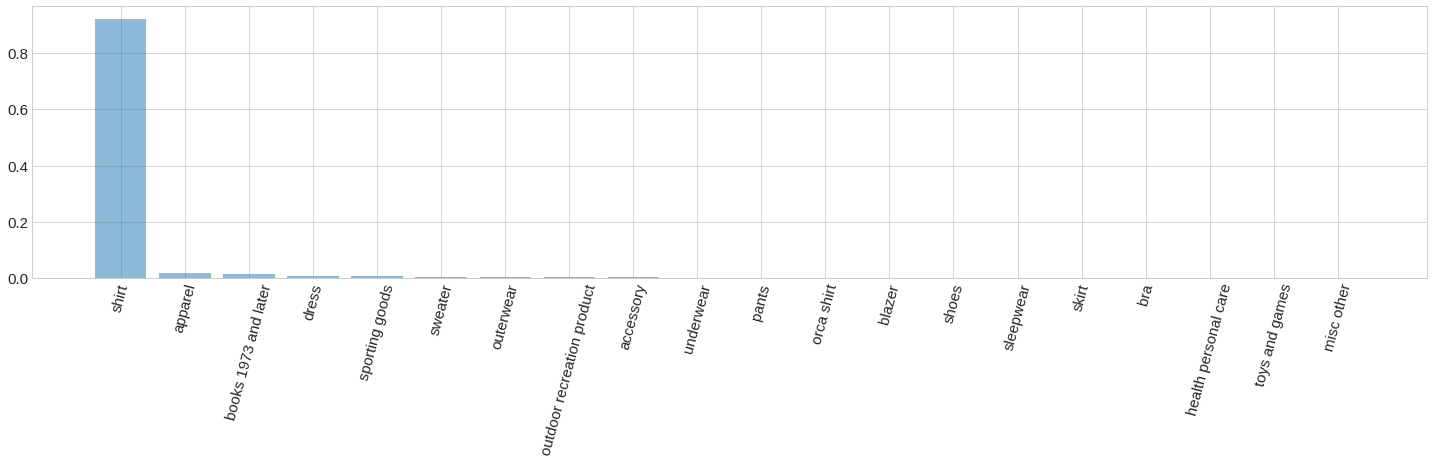

In [ ]:
df, col_name = df_data, 'item'

df_prod_propotions = fn_plot_proprotions(df, col_name)

## 2.BRAND:

TOP 20 of 10274 CATEGORIES:


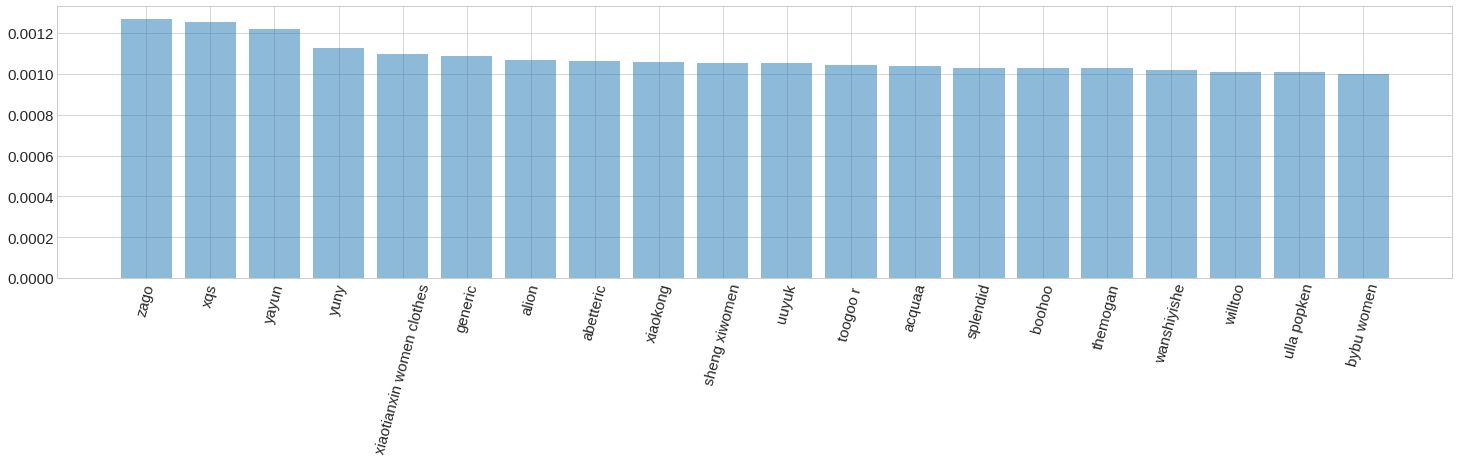

In [ ]:
df, col_name = df_data, 'brand'

df_prod_propotions = fn_plot_proprotions(df, col_name)

## 3.COLOR:

TOP 20 of 7010 CATEGORIES:


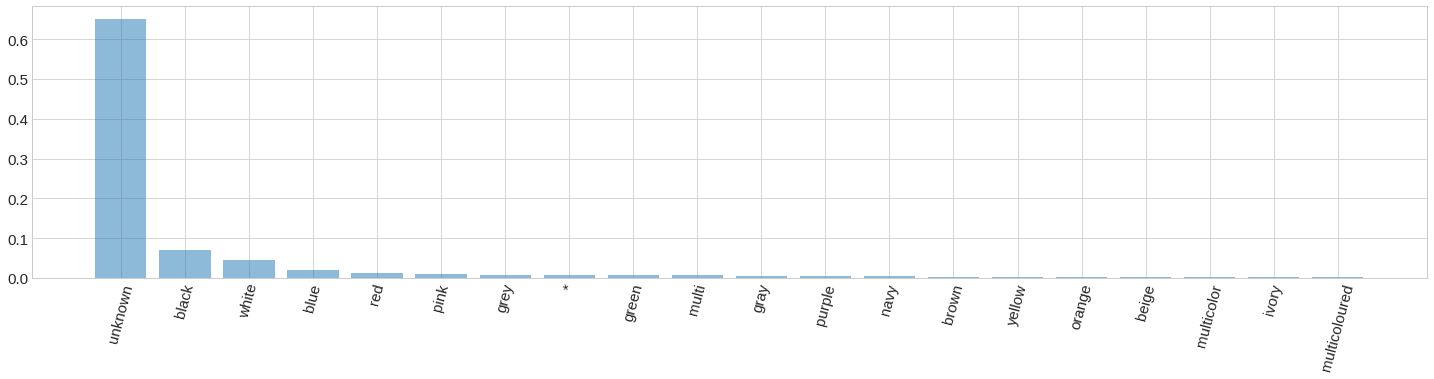

In [ ]:
df, col_name = df_data, 'color'

df_prod_propotions = fn_plot_proprotions(df, col_name)

TOP 20 of 7009 CATEGORIES:


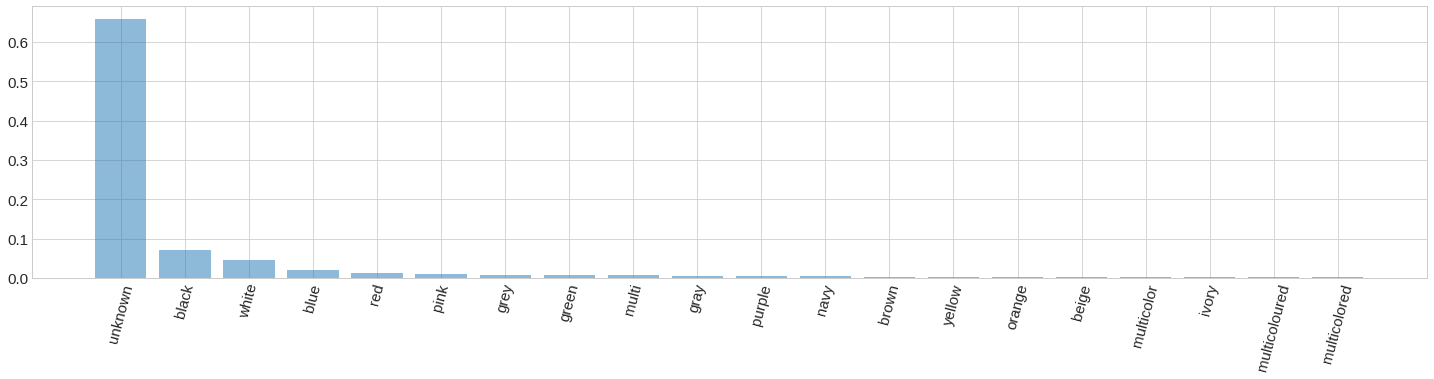

In [ ]:
df_data.color = df_data.color.replace('*', 'unknown')

df, col_name = df_data, 'color'

df_prod_propotions = fn_plot_proprotions(df, col_name)

***

# C.EXAMINING DESCRIPTION TEXT:

In [ ]:
listO_sample_text = df_data.title.sample(30).values

listO_sample_text

array(['that s what i do i drink and i know things baseball t shirts for womens',
       'zara terez womens cd crop top l blue',
       'tuxe bodywear women s accelerator bodysuit',
       'black dragon t shirt woman v tee black real men use three pedal jdm die cut',
       'derek heart women s vee neck cold shoulder burnout top',
       'tracy reese womens flyaway blouse black',
       'woman white gem embellished flora silhouette half dolman sleeve black top',
       'mango women s braided cord blouse',
       'yesno e31 women girl tops blouse 100 linen striped casual funny cartoon printed short sleeve summer',
       'dorathy womens fashion cat town printing crop top vest kawaii cropped tops',
       'sag harbor women s s crewneck america tee',
       'clubwearguru women s hand braided cut clubwear top shirt',
       'ruff hewn striped scrunch neck top',
       'coolred women s solid colored sleeveless chiffon shirt top',
       'eshion women s round neck slim pullover striped stret

In [ ]:
df_data.to_csv(data_path + 'df_amazon.csv')

***